<h1>Exploratory Data Analysis for model creation</h1>
<h4>
This dataset is from a fictional Telco (Telecommunications) company providing 
phone and internet services to ~7,000 customers in California. 

What is Churn?
Churn is when a customer stops using the company’s services. Predicting churn 
helps identify at-risk customers and improve retention.

Goal:
Perform Exploratory Data Analysis (EDA) to understand factors affecting churn

Target Variable:
Churn Label (Yes/No) or Churn Value (1 = churned, 0 = retained)

Dataset:
7043 rows, 33 columns (customer info, subscriptions, billing, churn status)

Churn distribution, service usage patterns are explored
to support future churn prediction models.</h4>

In [67]:
#Libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
data = pd.read_csv(r"D:\Documents\ML\FinTech Project\Telco_customer_churn.csv")
print(data.shape)
data.head()

(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [69]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [70]:
#Removing the columns that are not that important for prediction 
churn_data = data.drop(labels=["CustomerID", "Zip Code", "Lat Long", "Latitude", "Longitude", "CLTV", "Churn Score", "Count"], axis=1)
churn_data.head()

,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,United States,California,Los Angeles,Male,No,No,No,2,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,United States,California,Los Angeles,Female,No,No,Yes,2,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,United States,California,Los Angeles,Female,No,No,Yes,8,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,United States,California,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,United States,California,Los Angeles,Male,No,No,Yes,49,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [71]:
#Check for missing values
misisng = churn_data.isna().sum()
misisng

Country                 0
State                   0
City                    0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [72]:
churn_data["Country"].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [73]:
#Drop the country column, as it is the same country in the entire dataset
churn_data = churn_data.drop(labels="Country", axis=1)

In [74]:
churn_data["State"].value_counts()

State
California    7043
Name: count, dtype: int64

In [75]:
#Drop the state column as it shows the same state in the entire dataset
churn_data = churn_data.drop(labels="State", axis=1)

In [76]:
churn_data["City"].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [77]:
churn_data.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [78]:
churn_data["Churn Label"].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

<h3>City Column Influence</h3>

In [79]:
city_churn_rate = (churn_data.groupby("City")["Churn Value"].mean())* 100
city_churn_rate = city_churn_rate.sort_values(ascending=False)
city_churn_rate.head(20)

City
Fort Jones          100.0
Eldridge            100.0
Maricopa            100.0
Boulder Creek       100.0
Riverbank           100.0
Twain               100.0
Johannesburg        100.0
Smith River         100.0
Tipton              100.0
Wrightwood          100.0
South Lake Tahoe    100.0
Truckee             100.0
Indian Wells         80.0
Panorama City        80.0
Seeley               80.0
San Dimas            80.0
Byron                75.0
Rio Dell             75.0
Running Springs      75.0
Quincy               75.0
Name: Churn Value, dtype: float64

This data shows how some cities have a 100 percent of churn rate suggesting that cities may contribute a lot in the churn 

<h3>Gender Column Influence</h3>

<Axes: xlabel='Gender', ylabel='count'>

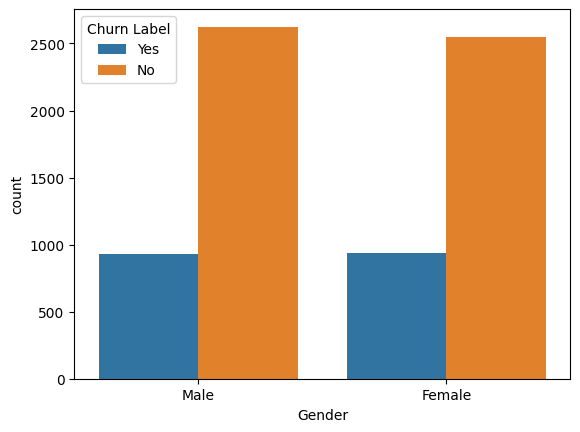

In [80]:
sns.countplot(data=churn_data, x="Gender", hue="Churn Label")

The gender column will not be significant in predicting the churn as it is balanced for both male and female

In [81]:
churn_data = churn_data.drop(labels="Gender", axis=1)

<h3>Senior Citizen Column Influence</h3>

<Axes: xlabel='Senior Citizen', ylabel='count'>

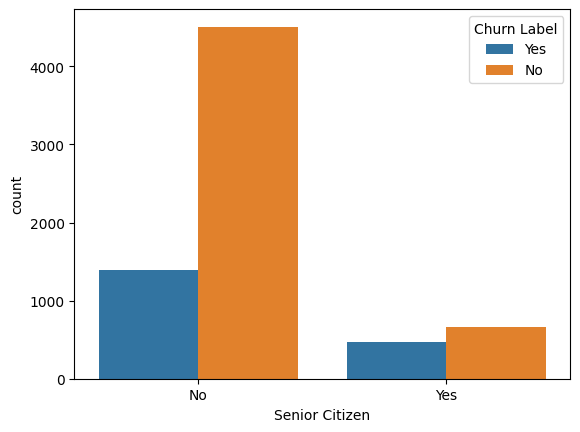

In [82]:
sns.countplot(data=churn_data, x="Senior Citizen", hue="Churn Label")

As observed, majority people are not senior citizens, and a significant portion of these people churn

<h3>Partner Column Influence</h3>

<Axes: xlabel='Partner', ylabel='count'>

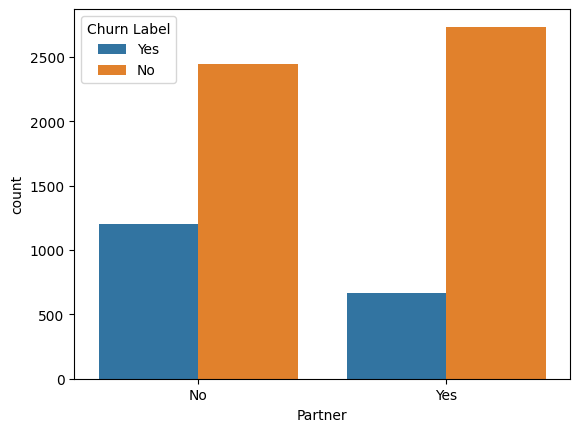

In [83]:
sns.countplot(data=churn_data, x="Partner", hue="Churn Label")

Majority people who churn generally do not have a partner

<h3>Dependents Column Influence</h3>

<Axes: xlabel='Dependents', ylabel='count'>

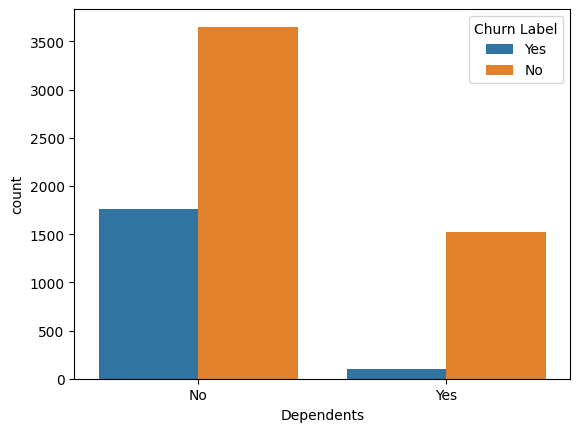

In [84]:
sns.countplot(data=churn_data, x="Dependents", hue="Churn Label")

People who have no dependants churn more than those who have dependants. People who do not have dependents make up the majority of customers

<h3>Tenure Months Column Influence</h3>

In [85]:
churn_data["Tenure Months"].value_counts()

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

<Axes: xlabel='Tenure Months', ylabel='Count'>

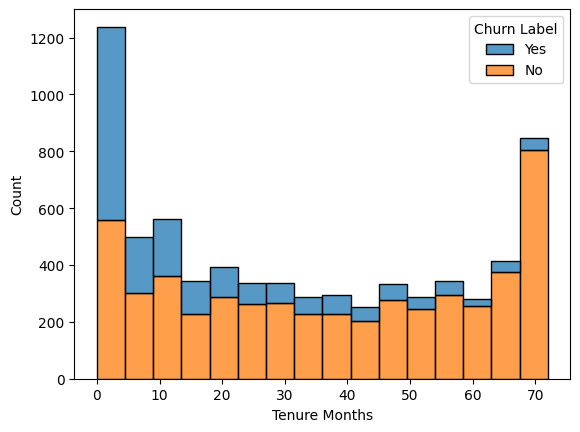

In [86]:
sns.histplot(data=churn_data, x="Tenure Months", hue="Churn Label", multiple="stack")  

Majority people who churn have a tenure less than 10 months

<h3>Phone Service Column Influence</h3>

<Axes: xlabel='Phone Service', ylabel='count'>

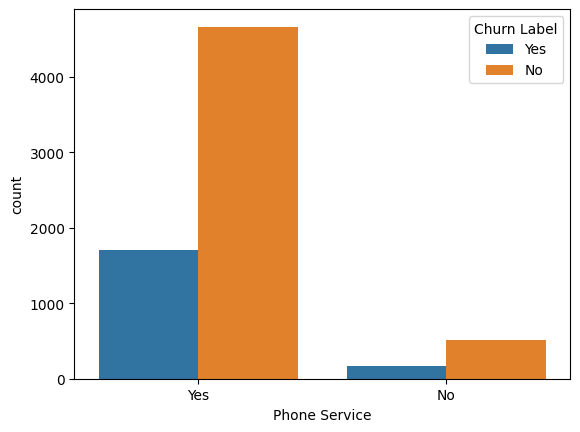

In [87]:
sns.countplot(data=churn_data, x="Phone Service", hue="Churn Label")

People who have phone service churn more than those who do not have mobile service.

<h3>Multiple Lines Column Influence</h3>

<Axes: xlabel='Multiple Lines', ylabel='count'>

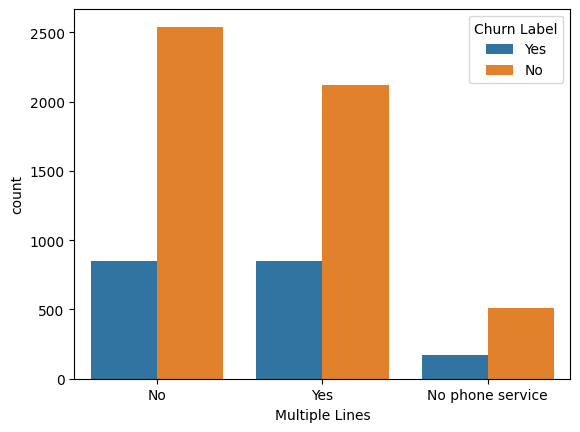

In [88]:
sns.countplot(data=churn_data, x="Multiple Lines", hue="Churn Label")

Customers who have multiple lines and single line churn almost equally and more than those who do not have phone service. This will not be a significant paramter for determining the churn likeliness

In [89]:
churn_data.groupby("Multiple Lines")["Churn Value"].mean()

Multiple Lines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn Value, dtype: float64

The means of these are almost equal, so it is proves that this feature is a weak feature, so we can remove this

In [90]:
churn_data = churn_data.drop("Multiple Lines", axis=1)

<h3>Internet Service Column Influence</h3>

In [91]:
churn_data["Internet Service"].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

<Axes: xlabel='Internet Service', ylabel='count'>

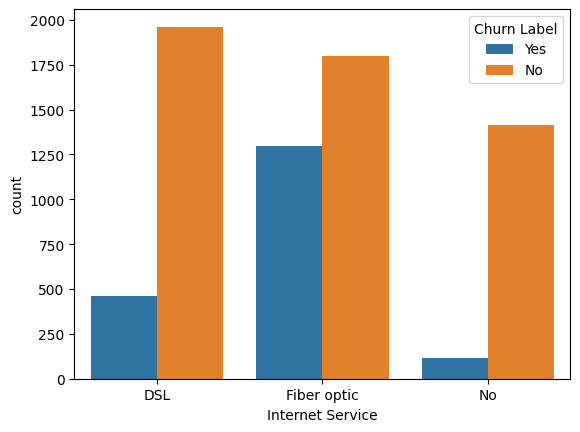

In [92]:
sns.countplot(data=churn_data, x="Internet Service", hue="Churn Label")

Majority people who churn use Fiber optic service

<h3>Online Service</h3>

<Axes: xlabel='Online Security', ylabel='count'>

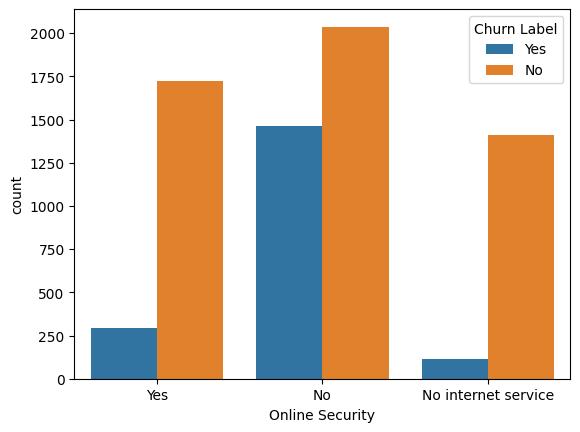

In [93]:
sns.countplot(data=churn_data, x="Online Security", hue="Churn Label")

Majority people who churn have no online security service

<h3>Online Backup</h3>

<Axes: xlabel='Online Backup', ylabel='count'>

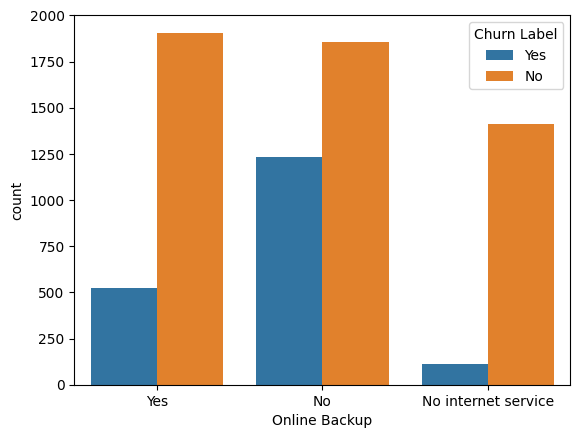

In [94]:
sns.countplot(data=churn_data, x="Online Backup", hue="Churn Label")

Majority people who churn have no online backup

<h3>Device Protection</h3>

<Axes: xlabel='Device Protection', ylabel='count'>

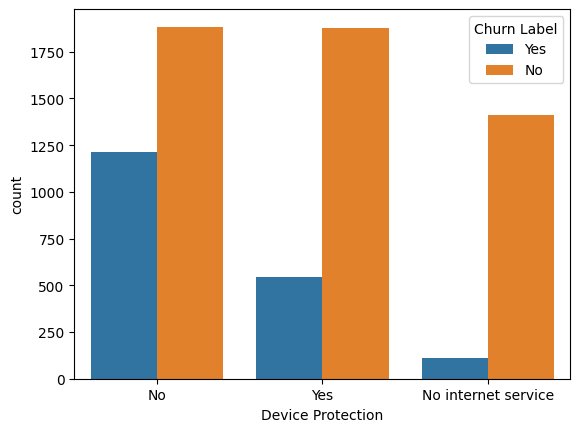

In [95]:
sns.countplot(data=churn_data, x="Device Protection", hue="Churn Label")

Majority people who churn have no device protection

<h3>Tech Support</h3>

<Axes: xlabel='Tech Support', ylabel='count'>

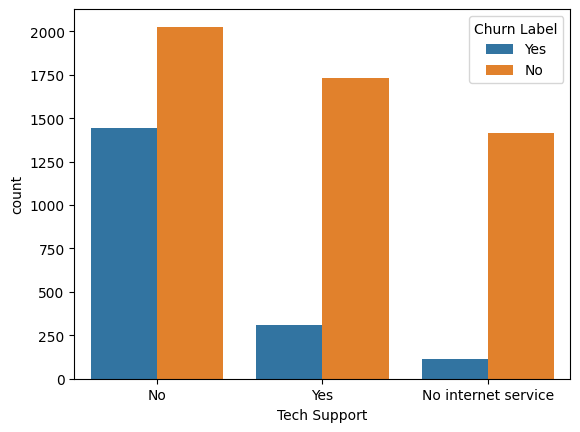

In [96]:
sns.countplot(data=churn_data, x="Tech Support", hue="Churn Label")

Majority people who churn have no tech support plan 

<h3>Streaming TV Column Influence</h3>

<Axes: xlabel='Streaming TV', ylabel='count'>

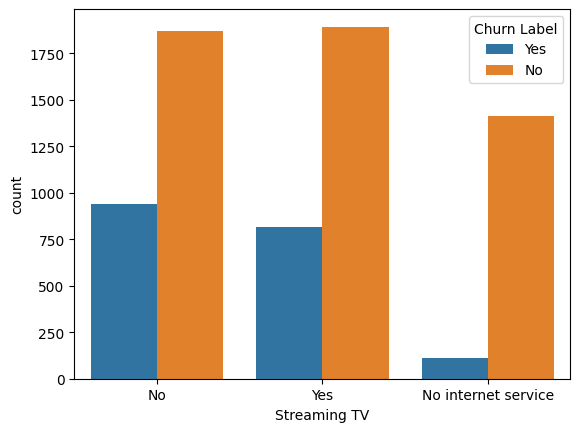

In [97]:
sns.countplot(data=churn_data, x="Streaming TV", hue="Churn Label")

The people with no internet service churn the least

<h3>Streaming Movies Column Influence</h3>

<Axes: xlabel='Streaming Movies', ylabel='count'>

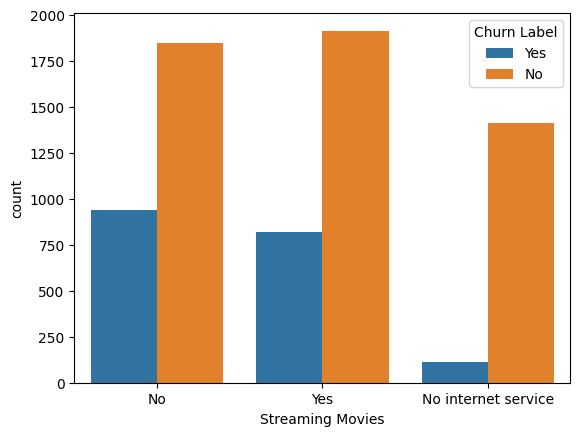

In [98]:
sns.countplot(data=churn_data, x="Streaming Movies", hue="Churn Label")

Both streaming movies and streaming TV appear the same, so we need to check the churn rates of both to check if they are similar so that we can drop one of them to reduce redundancy

In [99]:
churn_data.groupby("Streaming TV")["Churn Value"].mean()

Streaming TV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn Value, dtype: float64

In [100]:
churn_data.groupby("Streaming Movies")["Churn Value"].mean()

Streaming Movies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn Value, dtype: float64

Hence, as both have almost same churn rates, we can drop one of the columns

In [101]:
churn_data = churn_data.drop(labels="Streaming Movies", axis=1)

<h3>Contract Column Influence</h3>

<Axes: xlabel='Contract', ylabel='count'>

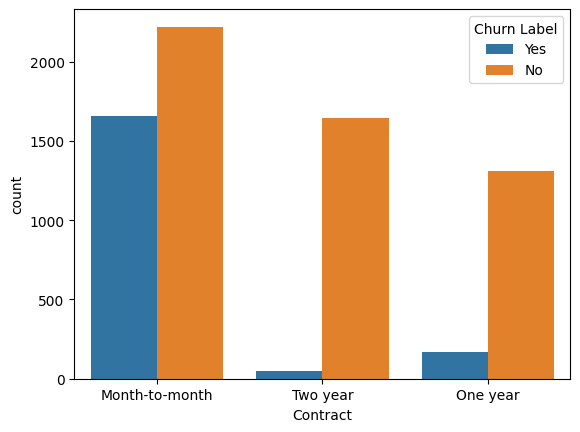

In [102]:
sns.countplot(data=churn_data, x="Contract", hue="Churn Label")

People with month to month contract churn the most

<h3>Paperless Billing Column Influece</h3>

<Axes: xlabel='Paperless Billing', ylabel='count'>

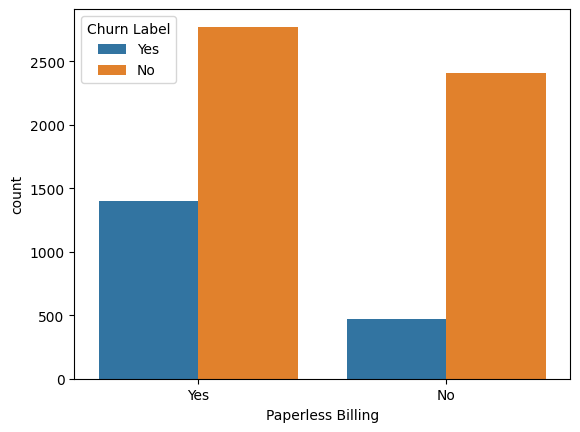

In [103]:
sns.countplot(data=churn_data, x="Paperless Billing", hue="Churn Label")

People with paperless billing churn more

<h3>Payment Method Column Influence</h3>

<Axes: xlabel='Payment Method', ylabel='count'>

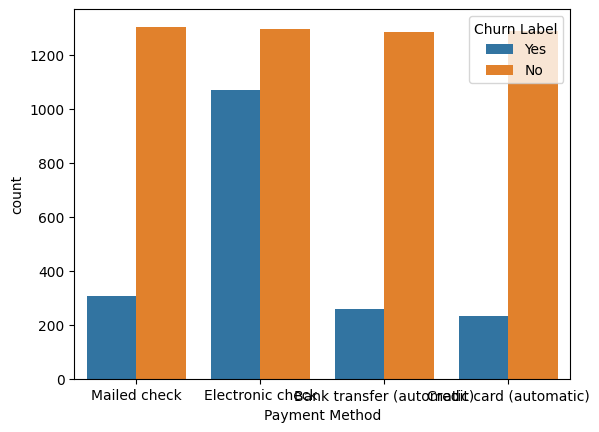

In [104]:
sns.countplot(data=churn_data, x="Payment Method", hue="Churn Label")

Majority people with electronic check payment method churn

<h3>Monthly Charge Column Influence</h3>

<Axes: xlabel='Monthly Charges', ylabel='Count'>

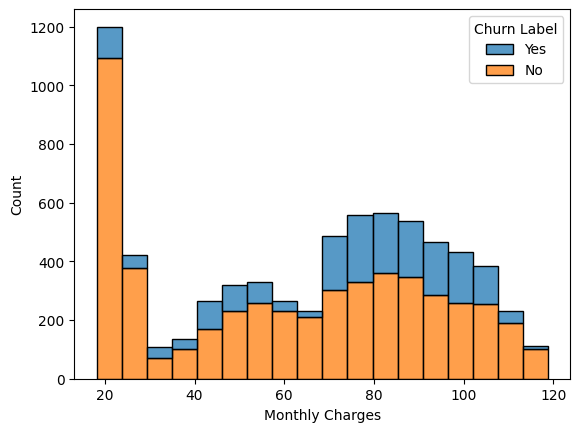

In [105]:
sns.histplot(data=churn_data, x="Monthly Charges", hue="Churn Label", multiple="stack") 

Majority people who do not churn have monthly charges of less than 30

<h3>Total Charges Column Influence</h3>

In [106]:
churn_data["Total Charges"].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: Total Charges, dtype: object

This column has the numeric data in form of strings, hence first convert it into numerical values

In [107]:
churn_data['Total Charges'] = churn_data['Total Charges'].replace(" ", np.nan)
churn_data['Total Charges'] = pd.to_numeric(churn_data['Total Charges'])

<Axes: xlabel='Total Charges', ylabel='Count'>

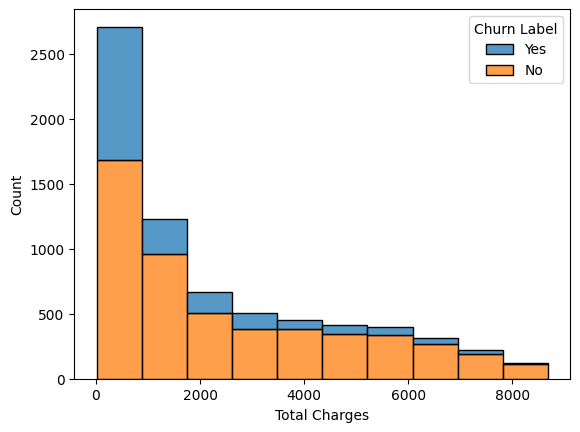

In [108]:
sns.histplot(data=churn_data, x="Total Charges", hue="Churn Label", multiple="stack", bins=10) 

Total Charges reflects tenure—new customers (low charges) churn more, while loyal customers (high charges) churn less—so it adds little beyond Tenure Months.

This information is mostly redundant as the same can be understood from the tenure months column, so we can drop this column

In [109]:
churn_data = churn_data.drop(labels="Total Charges", axis=1)

<h3>Churn Reason Column Influence<h3>

In [110]:
churn_data["Churn Reason"].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

This shows that better customer support can help reduce churn.

In [111]:
churn_data["Churn Reason"].isna().sum()

5174

As almost 73% of the data is not known in this column, this column cannot be used for prediction, hence we have to drop the column

In [112]:
churn_data = churn_data.drop(labels="Churn Reason", axis=1)

<h3>Final Data that influences churn</h3>

In [113]:
churn_data.head()

,City,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Label,Churn Value
0,Los Angeles,No,No,No,2,Yes,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
1,Los Angeles,No,No,Yes,2,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1
2,Los Angeles,No,No,Yes,8,Yes,Fiber optic,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,99.65,Yes,1
3,Los Angeles,No,Yes,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes,1
4,Los Angeles,No,No,Yes,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,Yes,1


<h3>Now, we need to check the correlation to check which features have a strong correlation with the Churn</h3>

In [114]:
#Library to calculate the mutual informaiton as majority of our features have binary values, pearson correlaion will not give accurate results
from sklearn.feature_selection import mutual_info_classif

Pearson correlation measures linear relationships between numeric variables and may miss patterns in categorical or binary data. Mutual Information detects any kind of relationship—linear or nonlinear—and works well with categorical variables, making it a better choice for analyzing binary or categorical data.

In [115]:
X = churn_data.drop(labels=["Churn Label", "Churn Value"], axis=1)
y = churn_data["Churn Value"]   #Choosing the numerical version for simplicity of processing by the model

In [116]:
#Converting the strings into numerical values
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes


In [117]:
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_series)

Contract             0.088427
Tenure Months        0.075917
Online Security      0.061320
Tech Support         0.059556
Monthly Charges      0.051981
Online Backup        0.050058
Internet Service     0.046872
Device Protection    0.043519
Dependents           0.042922
Payment Method       0.034504
Streaming TV         0.028833
Paperless Billing    0.020258
Partner              0.013664
Senior Citizen       0.008251
City                 0.006603
Phone Service        0.000000
dtype: float64


Contract type and tenure are the strongest churn predictors — focus on these for retention strategies.

Services related to security, tech support, and internet also play meaningful roles.

Some demographic features like partner status and senior citizen age have a weak effect.

City and phone service do not provide useful info for predicting churn in this dataset.

Features with near-zero MI can be considered for dropping to simplify models.

In [126]:
cols_to_drop = ["Partner", "Senior Citizen", "City", "Phone Service", 
                "Device Protection", "Dependents", "Internet Service", 
                "Payment Method", "Streaming TV", "Paperless Billing"]

churn_data = churn_data.drop(columns=[col for col in cols_to_drop if col in churn_data.columns])


<h2>Final Data</h2>

In [127]:
churn_data.head()

,Tenure Months,Online Security,Online Backup,Tech Support,Contract,Monthly Charges,Churn Label,Churn Value
0,2,Yes,Yes,No,Month-to-month,53.85,Yes,1
1,2,No,No,No,Month-to-month,70.70,Yes,1
2,8,No,No,No,Month-to-month,99.65,Yes,1
3,28,No,No,Yes,Month-to-month,104.80,Yes,1
4,49,No,Yes,No,Month-to-month,103.70,Yes,1


This data must be exported as csv file for further processes in making a prediction model for churn

In [128]:
churn_data.to_csv(path_or_buf=r"D:\Documents\ML\FinTech Project\data_after_EDA.csv")